In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
combinations <- expand.grid(c("MT", "SD", "SHA256"),
                            c("3", "10"),
                            c("PIKK", "sbi"))

rawdatafiles <- list.files("../rawdata/")

res <- lapply(1:nrow(combinations), function(index){
  filename <- paste0(combinations[index, 1],
                     "_1000seeds_", combinations[index, 3],
                     "_n13_k", combinations[index, 2], ".csv")
  if(!(filename %in% rawdatafiles)){ return()}
  
  tmp <- read.csv(paste0("../rawdata/", filename), header = TRUE)
  tmp$PRNG <- rep(combinations[index, 1], nrow(tmp))
  tmp$algorithm <- rep(combinations[index, 3], nrow(tmp))
  return(tmp)
})
res <- do.call(rbind, res)
head(res)
dim(res)
str(res)

seed,reps,PopSize,SampleSize,chisqStat,chisqDF,chisqPvalue,rangeStat,rangePvalue,PRNG,algorithm
739828299,100000,13,10,276.7423,285,0.6260008,106,0.5072798,MT,PIKK
739828299,1200000,13,10,254.1632,285,0.9054401,354,0.6602790,MT,PIKK
739828299,2300000,13,10,275.8785,285,0.6399058,562,0.1575445,MT,PIKK
739828299,3400000,13,10,287.3395,285,0.4500107,592,0.6861283,MT,PIKK
739828299,4500000,13,10,295.5533,285,0.3211339,647,0.8563070,MT,PIKK
739828299,5600000,13,10,291.7515,285,0.3788654,735,0.8039327,MT,PIKK


[1] 30100    11

'data.frame':	30100 obs. of  11 variables:
 $ seed       : num  7.4e+08 7.4e+08 7.4e+08 7.4e+08 7.4e+08 ...
 $ reps       : int  100000 1200000 2300000 3400000 4500000 5600000 6700000 7800000 8900000 10000000 ...
 $ PopSize    : int  13 13 13 13 13 13 13 13 13 13 ...
 $ SampleSize : int  10 10 10 10 10 10 10 10 10 10 ...
 $ chisqStat  : num  277 254 276 287 296 ...
 $ chisqDF    : int  285 285 285 285 285 285 285 285 285 285 ...
 $ chisqPvalue: num  0.626 0.905 0.64 0.45 0.321 ...
 $ rangeStat  : int  106 354 562 592 647 735 808 891 1022 1205 ...
 $ rangePvalue: num  0.507 0.66 0.158 0.686 0.856 ...
 $ PRNG       : Factor w/ 3 levels "MT","SD","SHA256": 1 1 1 1 1 1 1 1 1 1 ...
 $ algorithm  : Factor w/ 2 levels "PIKK","sbi": 1 1 1 1 1 1 1 1 1 1 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


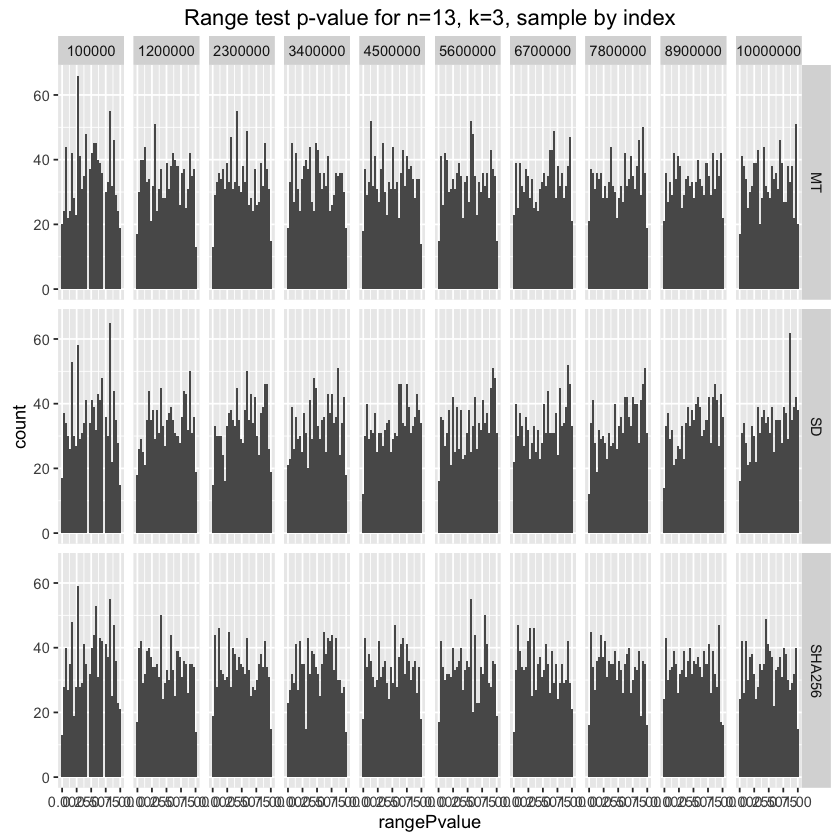

In [3]:
res %>% 
    filter(PopSize == 13, SampleSize == 3, algorithm == "sbi") %>%
#    filter(reps %in% c(1e5, 1e7)) %>%
    ggplot(aes(rangePvalue)) + 
    geom_histogram() +
    facet_grid(PRNG~reps) +
    ggtitle("Range test p-value for n=13, k=3, sample by index") 

## A closer look at the last panel, 1e7 reps

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


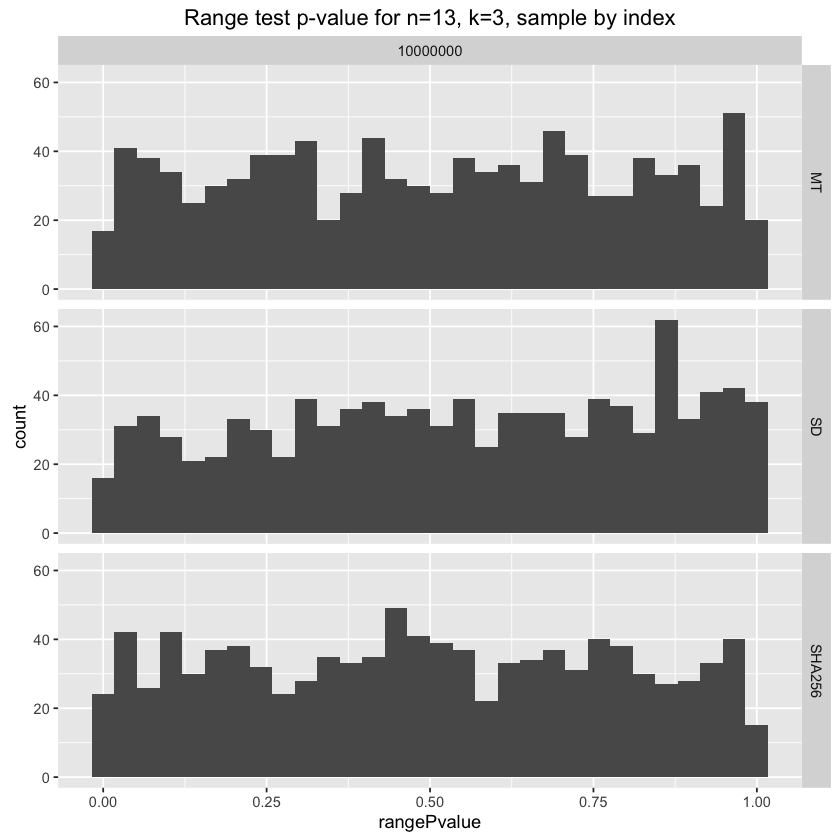

In [4]:
res %>% 
    filter(PopSize == 13, SampleSize == 3, algorithm == "sbi") %>%
    filter(reps == 1e7) %>%
    ggplot(aes(rangePvalue)) + 
    geom_histogram() +
    facet_grid(PRNG~reps) +
    ggtitle("Range test p-value for n=13, k=3, sample by index") 

## Kolmogorov-Smirnov test for uniformity of these p-values

In [5]:
sapply(c("MT", "SD", "SHA256"), function(x){
    res %>% filter(PRNG == x, 
                   algorithm == "sbi",
                   SampleSize == 3,
                   PopSize == 13, 
                   reps == 1e7) %>% 
    select(rangePvalue) %>% 
    ks.test(y = punif)
    })

Warning message in ks.test(., y = punif):
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(., y = punif):
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(., y = punif):
“ties should not be present for the Kolmogorov-Smirnov test”

,MT,SD,SHA256
statistic,0.02177979,0.066951,0.02532641
p.value,0.7298936,0.0002556439,0.542693
alternative,two-sided,two-sided,two-sided
method,One-sample Kolmogorov-Smirnov test,One-sample Kolmogorov-Smirnov test,One-sample Kolmogorov-Smirnov test
data.name,.,.,.
